In [1]:
from data_flywheel import DataFlywheel

/root/miniforge-pypy3/envs/data_flywheel/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
INFO     - The mmdet config folder already exists. No need to downloaded it. Path : /root/.icevision/mmdetection_configs/mmdetection_configs-2.20.1/configs | icevision.models.mmdet.download_configs:download_mmdet_configs:17


In [2]:
# Create a configuration dictionary
config = {
    'annotation_path': '/root/data-flywheel/notebooks/pascal_voc_annotations/',
    'image_path': '/workspace/yolo_v8_training/oiv7_full/test/',
    'log_wandb': True,
    'object_class_name': 'car_(automobile)',
    'wandb_project': 'data-flywheel-car',
    'image_size': 480
}

# Instantiate the DataFlywheel
flywheel = DataFlywheel(config)


04/10/2024 06:44:56 - ERROR - wandb.jupyter -   Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: dnth. Use `wandb login --relogin` to force relogin


wandb: Adding directory to artifact (/root/data-flywheel/notebooks/pascal_voc_annotations)... Done. 4.3s


In [3]:
# flywheel.run()

In [4]:
flywheel.log_wandb

True

INFO     - Loading image annotations... | data_flywheel.flywheel:load_annotations:33
INFO     -   Annotations folder: /root/data-flywheel/notebooks/pascal_voc_annotations/ | data_flywheel.flywheel:load_annotations:35
INFO     -   Image folder: /workspace/yolo_v8_training/oiv7_full/test/ | data_flywheel.flywheel:load_annotations:36


  0%|          | 0/17374 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:122


  0%|          | 0/17374 [00:00<?, ?it/s]

AUTOFIX-FAIL - (record_id: d5abdc1153bbfb66) - Cannot auto-fix coordinates: <BBox (xmin:412, ymin:1024, xmax:428, ymax:1024)>
	y_min:1024 is greater than or equal to y_max:1024 | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-FAIL - (record_id: d5abdc1153bbfb66) - Cannot auto-fix coordinates: <BBox (xmin:413, ymin:1024, xmax:429, ymax:1024)>
	y_min:1024 is greater than or equal to y_max:1024 | icevision.utils.logger_utils:autofix_log:17
AUTOFIX-REPORT - (record_id: d5abdc1153bbfb66) Removed annotation with index: 25, for more info check the AUTOFIX-FAIL messages above | icevision.core.record:autofix:45
AUTOFIX-REPORT - (record_id: d5abdc1153bbfb66) Removed annotation with index: 21, for more info check the AUTOFIX-FAIL messages above | icevision.core.record:autofix:45
AUTOFIX-FAIL - (record_id: e1e6d9fecf569264) - Cannot auto-fix coordinates: <BBox (xmin:1024, ymin:799, xmax:1024, ymax:804)>
	x_min:1024 is greater than or equal to x_max:1024 | icevision.utils.logger_utils:autofix_

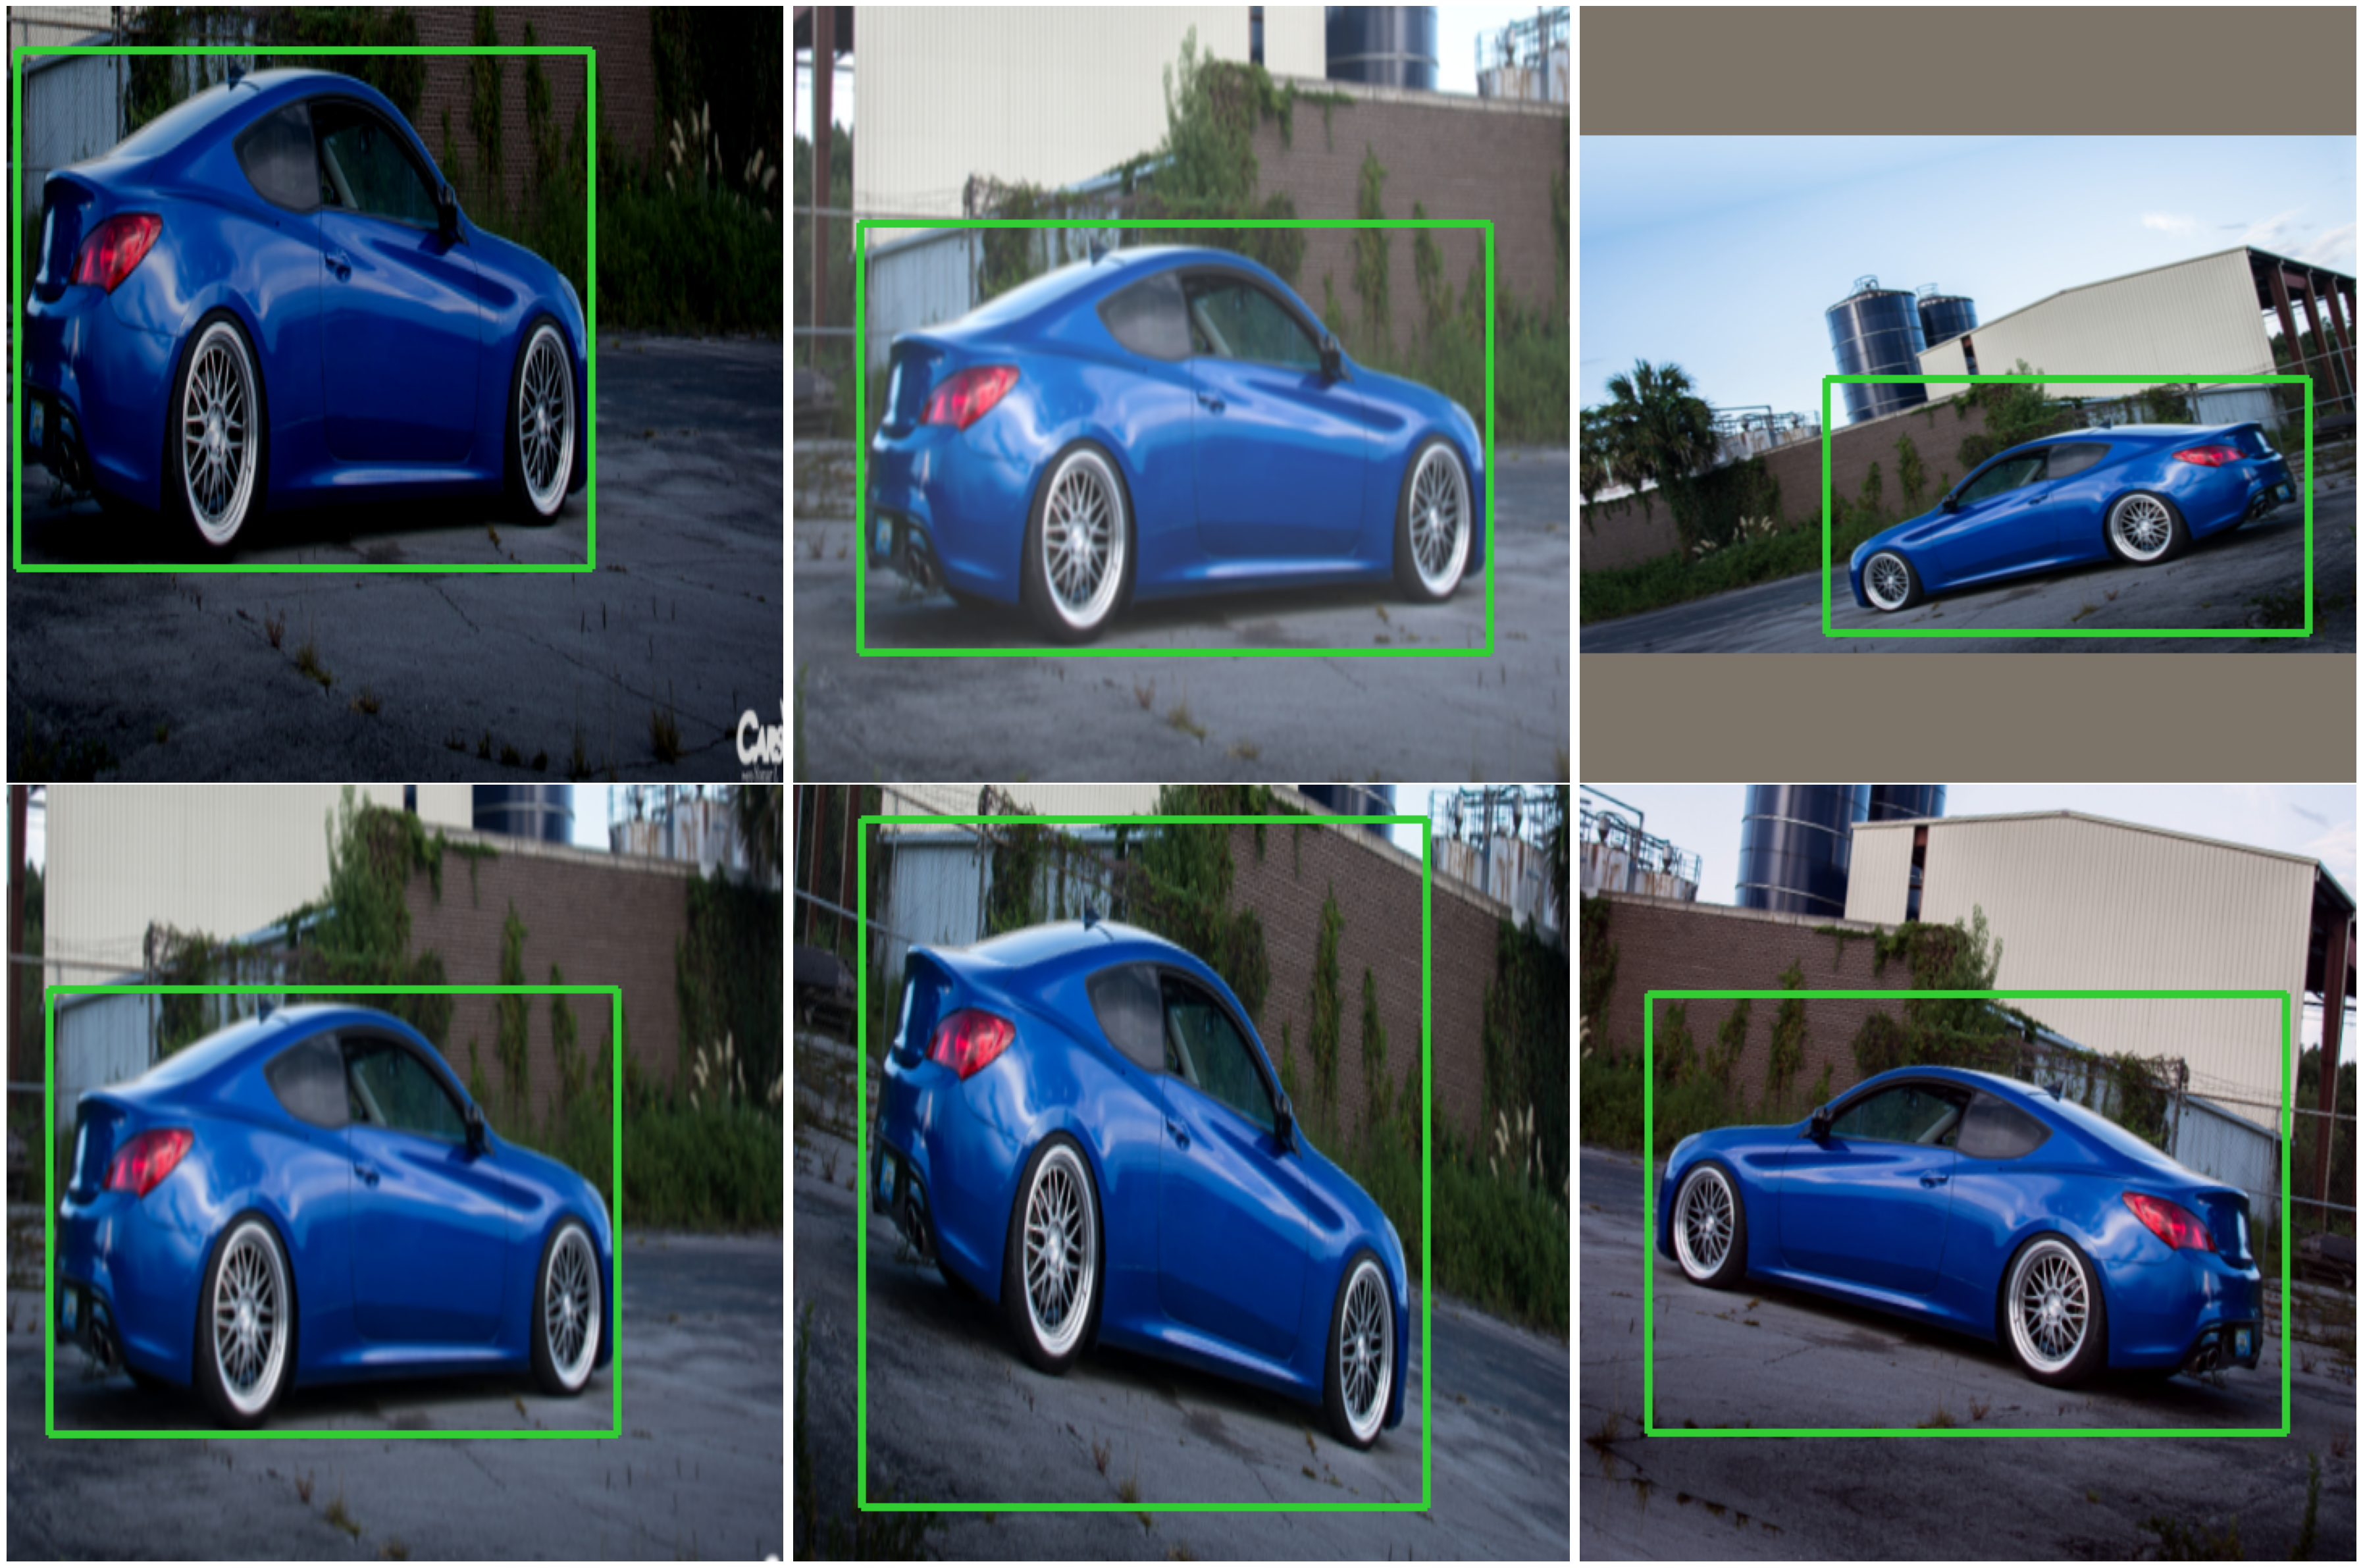

In [5]:
%matplotlib inline
flywheel.load_annotations(show=True)

INFO     - Loading model... | data_flywheel.flywheel:load_model:64
2024-04-10 06:45:27,744 - mmcv - INFO - initialize ResNet with init_cfg {'type': 'Pretrained', 'checkpoint': 'torchvision://resnet50'}
2024-04-10 06:45:27,745 - mmcv - INFO - load model from: torchvision://resnet50
2024-04-10 06:45:27,745 - mmcv - INFO - load checkpoint from torchvision path: torchvision://resnet50
2024-04-10 06:45:27,802 - mmcv - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

2024-04-10 06:45:27,810 - mmcv - INFO - initialize FPN with init_cfg {'type': 'Xavier', 'layer': 'Conv2d', 'distribution': 'uniform'}
2024-04-10 06:45:27,821 - mmcv - INFO - initialize VFNetHead with init_cfg {'type': 'Normal', 'layer': 'Conv2d', 'std': 0.01, 'override': {'type': 'Normal', 'name': 'vfnet_cls', 'std': 0.01, 'bias_prob': 0.01}}
2024-04-10 06:45:27,836 - mmcv - INFO - 
backbone.conv1.weight - torch.Size([64, 3, 7, 7]): 
PretrainedInit: load fro

load checkpoint from local path: checkpoints/vfnet/vfnet_r50_fpn_mstrain_2x_coco_20201027-7cc75bd2.pth
The model and loaded state dict do not match exactly

size mismatch for bbox_head.vfnet_cls.weight: copying a param with shape torch.Size([80, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([1, 256, 3, 3]).
size mismatch for bbox_head.vfnet_cls.bias: copying a param with shape torch.Size([80]) from checkpoint, the shape in current model is torch.Size([1]).


/root/miniforge-pypy3/envs/data_flywheel/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


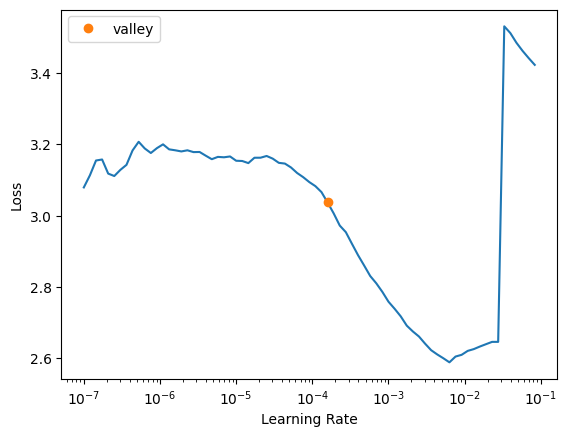

In [6]:
flywheel.load_model()

INFO     - Training model... | data_flywheel.flywheel:train_model:97


Could not gather input dimensions
WandbCallback was not able to prepare a DataLoader for logging prediction samples -> 'Dataset' object has no attribute 'items'


Better model found at epoch 0 with valid_loss value: 1.5596449375152588.


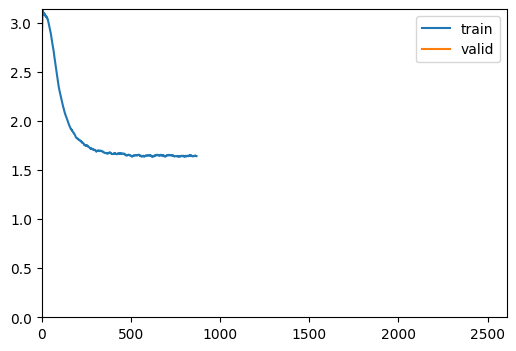

In [7]:
flywheel.train_model(lr=3e-4, epoch=5, freeze_epoch=3)

In [ ]:
annotations_to_review = flywheel.get_most_wrong(method='top-loss')

In [ ]:
len(flywheel.annotations_to_review)

In [ ]:
flywheel.relabel_data(relabel_filename='relabel_list.txt')

In [ ]:
flywheel.log_wandb